今天来学习多分类问题
# 一、 自带数据集介绍

In [24]:
import sklearn.datasets

# 获取 sklearn.datasets 模块下所有的属性名
all_names = dir(sklearn.datasets)

print("【1】自带的小数据集 (load_*) - 适合练手/测试：")
print([name for name in all_names if name.startswith("load_")]) # startswith 方法用于判断字符串是否以指定子字符串开头

print("\n【2】在线下载的大数据集 (fetch_*) - 适合真实项目：")
print([name for name in all_names if name.startswith("fetch_")])

print("\n【3】构造的假数据 (make_*) - 适合做实验/画图：")
print([name for name in all_names if name.startswith("make_")])

【1】自带的小数据集 (load_*) - 适合练手/测试：
['load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine']

【2】在线下载的大数据集 (fetch_*) - 适合真实项目：
['fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions']

【3】构造的假数据 (make_*) - 适合做实验/画图：
['make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make_friedman3', 'make_gaussian_quantiles', 'make_hastie_10_2', 'make_low_rank_matrix', 'make_moons', 'make_multilabel_classification', 'make_regression', 'make_s_curve', 'make_sparse_coded_signal', 'make_sparse_spd_matrix', 'make_sparse_uncorrelated', 'make_spd_matrix', 'make_swiss_roll']


# 二、红酒三分类数据集实战

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets

# --- 1. 加载数据 ---
wine = datasets.load_wine()
X = wine.data
y = wine.target
n_classes = len(np.unique(y))     # 类别数量：3
class_names = wine.target_names    # ['class_0', 'class_1', 'class_2']

# 转换成 DataFrame 显示
df = pd.DataFrame(X, columns=wine.feature_names)
df['label (标签)'] = y  # 把标签也加进去

# 打印前 5 行
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label (标签)
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

随机森林虽然只训练 1 个模型，但为了画多分类的 ROC 曲线，我们必须把它“拆成多个二分类器的结果”，每个类别各画一条 ROC 曲线。
而 One-vs-Rest（OVR）策略要求 y 是 one-hot 编码。

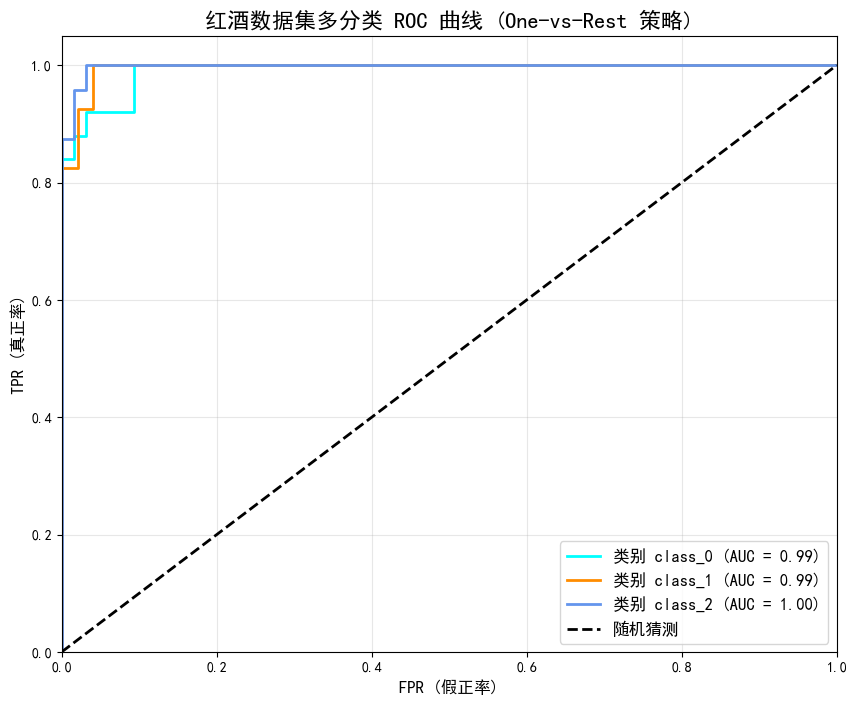

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# --- 1. 设置画图风格 ---
plt.rcParams['font.sans-serif'] = ['SimHei']    # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False       # 正常显示负号

# --- 2. 加载红酒数据集 & 预处理 ---
wine = datasets.load_wine()
X = wine.data
y = wine.target
n_classes = len(np.unique(y))       # 类别数量：3
class_names = wine.target_names     # ['class_0', 'class_1', 'class_2']

# 标签二值化（One-Hot）
y = label_binarize(y, classes=[0, 1, 2])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0
)

# --- 3. 模型训练（One-vs-Rest） ---
classifier = OneVsRestClassifier(
    LogisticRegression(random_state=0, solver='liblinear')
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# --- 4. 计算各类的 ROC 和 AUC ---
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 5. 绘图 ---
plt.figure(figsize=(10, 8))

colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i], tpr[i],
        color=color, lw=2,
        label='类别 {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i])
    )

# 随机猜测基准线
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='随机猜测')

# 图表装饰
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (假正率)', fontsize=12)
plt.ylabel('TPR (真正率)', fontsize=12)
plt.title('红酒数据集多分类 ROC 曲线 (One-vs-Rest 策略)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()


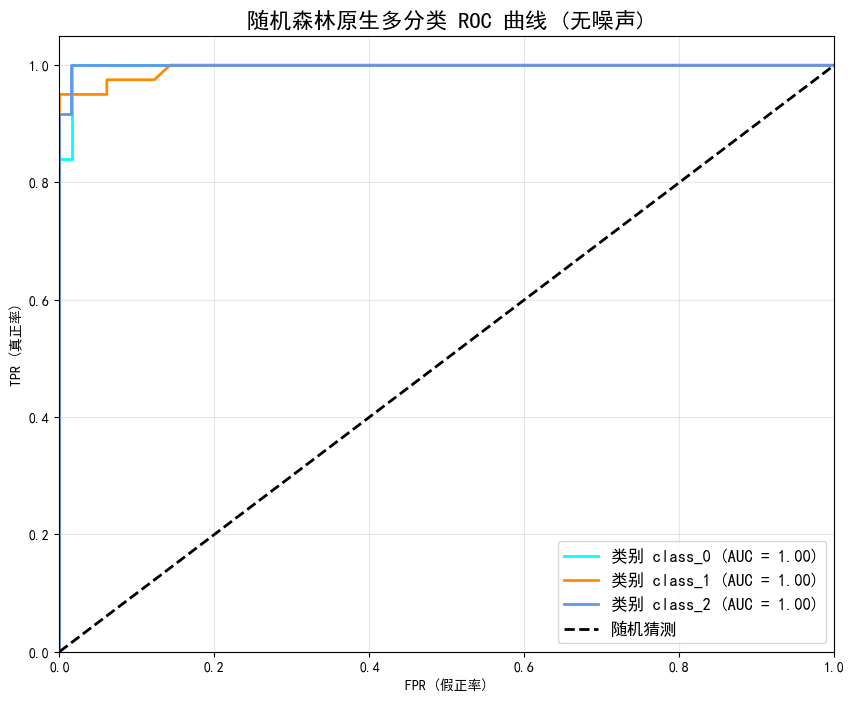

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# --- 1. 设置画图风格 ---
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 2. 加载纯净数据 (无噪声) ---
wine = datasets.load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names

# --- 3. 标签处理 ---
# 准备二值化标签用于画图 (One-Hot)
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# 切分数据
# 技巧：我们切分 y_bin，这样测试集 y_test_bin 就是 One-Hot 的，方便画图
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.5, random_state=0)

# 【核心步骤】训练集转回整数标签 [0, 1, 2]
# 随机森林最喜欢吃整数标签，原生支持！
y_train_integer = np.argmax(y_train_bin, axis=1)

# --- 4. 训练模型 (随机森林) ---
# 不需要指定 multi_class参数，它自动识别 y 是多分类
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train_integer)

# --- 5. 获取预测概率 ---
# 原生输出 (N_samples, 3) 的矩阵
# 每一行代表：这棵树觉得是类0、类1、类2的概率分别是多少
y_score = clf.predict_proba(X_test)

# --- 6. 绘制 ROC 曲线 ---
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']

for i in range(n_classes):
    # 计算第 i 类的 ROC
    # 依然是把第 i 列拎出来做二分类评估
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='类别 {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='随机猜测')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (假正率)')
plt.ylabel('TPR (真正率)')
plt.title('随机森林原生多分类 ROC 曲线 (无噪声)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

==================== 多分类详细指标报告 ====================
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        25
     class_1       1.00      0.93      0.96        40
     class_2       0.92      1.00      0.96        24

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89

【AUC 汇总】
  Micro-average AUC (微平均): 0.9955
  Macro-average AUC (宏平均): 0.9974
  Weighted-average AUC (加权): 0.9968


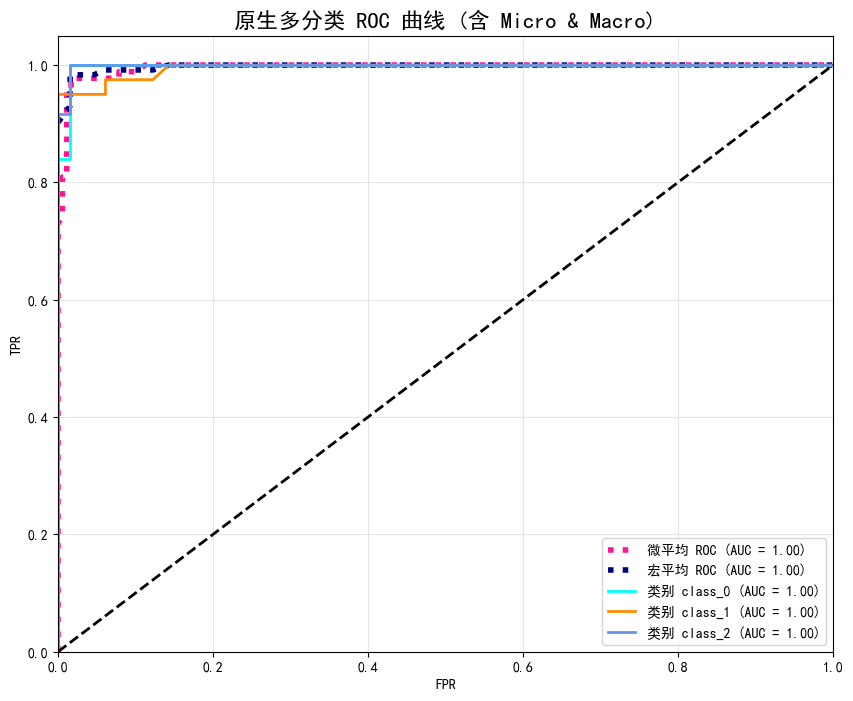

In [29]:
from sklearn.metrics import classification_report, roc_auc_score

# ==========================================
# 6. (新增) 计算 Precision/Recall/F1 的三种平均
# ==========================================

# 为了生成分类报告，我们需要“硬预测”（类别 0, 1, 2），而不是概率
# 使用 argmax 从概率矩阵中选出概率最大的那个类别
y_pred_class = np.argmax(y_score, axis=1)
# y_test_bin 是 One-Hot 的，我们也把它转回整数方便对比
y_test_integer = np.argmax(y_test_bin, axis=1)

print("="*20 + " 多分类详细指标报告 " + "="*20)
# classification_report 自动帮你算好了 Macro, Weighted 和 Accuracy (Micro)
print(classification_report(y_test_integer, y_pred_class, target_names=class_names))


# ==========================================
# 7. (新增) 计算 AUC 的三种平均 并画在图上
# ==========================================

# --- A. 计算 Micro-average ROC (微平均) ---
# 逻辑：把所有类别的预测结果“展平”成一条长长的线，看作一个巨大的二分类
# y_test_bin.ravel() -> 把 [[1,0,0], [0,1,0]] 变成 [1,0,0,0,1,0...]
# y_score.ravel()    -> 把概率矩阵也展平
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# --- B. 计算 Macro-average ROC (宏平均) ---
# 逻辑：把刚才算好的 3 条线的 TPR 加起来除以 3
# 这一步稍微复杂点，需要对齐横坐标（FPR），通过插值来实现
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# --- C. 计算 Weighted-average AUC (加权平均) ---
# sklearn 直接提供了函数，根据样本数量加权
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')
print(f"【AUC 汇总】")
print(f"  Micro-average AUC (微平均): {roc_auc['micro']:.4f}")
print(f"  Macro-average AUC (宏平均): {roc_auc['macro']:.4f}")
print(f"  Weighted-average AUC (加权): {weighted_auc:.4f}")


# ==========================================
# 8. (进阶) 重新画图：加上平均线
# ==========================================
plt.figure(figsize=(10, 8))

# 1. 画 Micro-average ROC 曲线 (粉色虚线)
plt.plot(fpr["micro"], tpr["micro"],
         label='微平均 ROC (AUC = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# 2. 画 Macro-average ROC 曲线 (深蓝色虚线)
plt.plot(fpr["macro"], tpr["macro"],
         label='宏平均 ROC (AUC = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# 3. 画每个类别的 ROC 曲线 (细线)
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='类别 {0} (AUC = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('原生多分类 ROC 曲线 (含 Micro & Macro)', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 三、MCC和KS指标

MCC (马修斯相关系数): 0.6681 (越接近1越好)
KS 统计量 (scipy计算): 0.6914
KS 统计量 (ROC推导): 0.6914, 最佳切分阈值: 0.4498


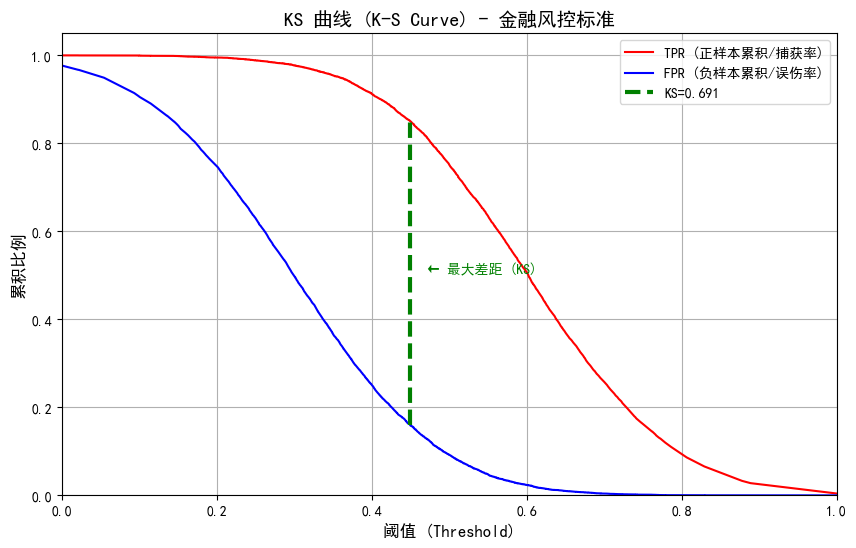

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, matthews_corrcoef
from scipy.stats import ks_2samp

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. 模拟数据 (还是之前的逻辑)
np.random.seed(42)
n_samples = 10000
y_true = np.array([0]*n_samples + [1]*n_samples)
# 模拟一个效果还不错的模型
y_scores_neg = np.random.normal(0.3, 0.15, n_samples)
y_scores_pos = np.random.normal(0.6, 0.15, n_samples)
y_scores = np.concatenate([y_scores_neg, y_scores_pos])
y_scores = np.clip(y_scores, 0, 1) # 限制在0-1

# --- 核心 1: 计算 MCC ---
# MCC 需要具体的预测类别(0或1)，所以我们需要先定一个阈值(比如0.5)
y_pred = (y_scores > 0.5).astype(int)
mcc = matthews_corrcoef(y_true, y_pred)
print(f"MCC (马修斯相关系数): {mcc:.4f} (越接近1越好)")

# --- 核心 2: 计算 KS 统计量 ---
# 方法A: 使用 scipy 直接通过原始分布计算 (最准确)
ks_stat, p_value = ks_2samp(y_scores[y_true==1], y_scores[y_true==0])
print(f"KS 统计量 (scipy计算): {ks_stat:.4f}")

# 方法B: 通过 ROC 曲线数据手动计算 (方便画图)
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
# KS 就是 TPR 和 FPR 差值的最大值
ks_diff = tpr - fpr
max_ks_idx = np.argmax(ks_diff) # 找到最大差值对应的索引
max_ks = ks_diff[max_ks_idx]
best_threshold = thresholds[max_ks_idx]

print(f"KS 统计量 (ROC推导): {max_ks:.4f}, 最佳切分阈值: {best_threshold:.4f}")

# --- 绘图: KS 曲线 ---
plt.figure(figsize=(10, 6))

# 绘制 TPR (覆盖率) 和 FPR (误伤率) 随阈值变化的曲线
plt.plot(thresholds, tpr, label='TPR (正样本累积/捕获率)', color='red')
plt.plot(thresholds, fpr, label='FPR (负样本累积/误伤率)', color='blue')

# 绘制 KS 最大距离线
plt.plot([best_threshold, best_threshold], [fpr[max_ks_idx], tpr[max_ks_idx]], 
         color='green', linestyle='--', lw=3, label=f'KS={max_ks:.3f}')

# 装饰
plt.title('KS 曲线 (K-S Curve) - 金融风控标准', fontsize=14)
plt.xlabel('阈值 (Threshold)', fontsize=12)
plt.ylabel('累积比例', fontsize=12)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc='best')
plt.grid(True)
plt.text(best_threshold+0.02, (fpr[max_ks_idx] + tpr[max_ks_idx])/2, 
         '← 最大差距 (KS)', color='green', fontweight='bold')

# 注意：x轴通常是阈值从1到0逆序，或者按分位数排序。
# 这里为了直观，直接展示随阈值变化的走势。
# 可以看到在 KS 线那里，红线和蓝线分得最开。

plt.show()

==================== 各类别最佳 MCC 分析 (基于概率) ====================
【类别 class_0】
  最佳 MCC: 0.8589
  最佳阈值: 0.6528 (概率值)
------------------------------
【类别 class_1】
  最佳 MCC: 0.6085
  最佳阈值: 0.0733 (概率值)
------------------------------
【类别 class_2】
  最佳 MCC: 0.3692
  最佳阈值: 0.0122 (概率值)
------------------------------


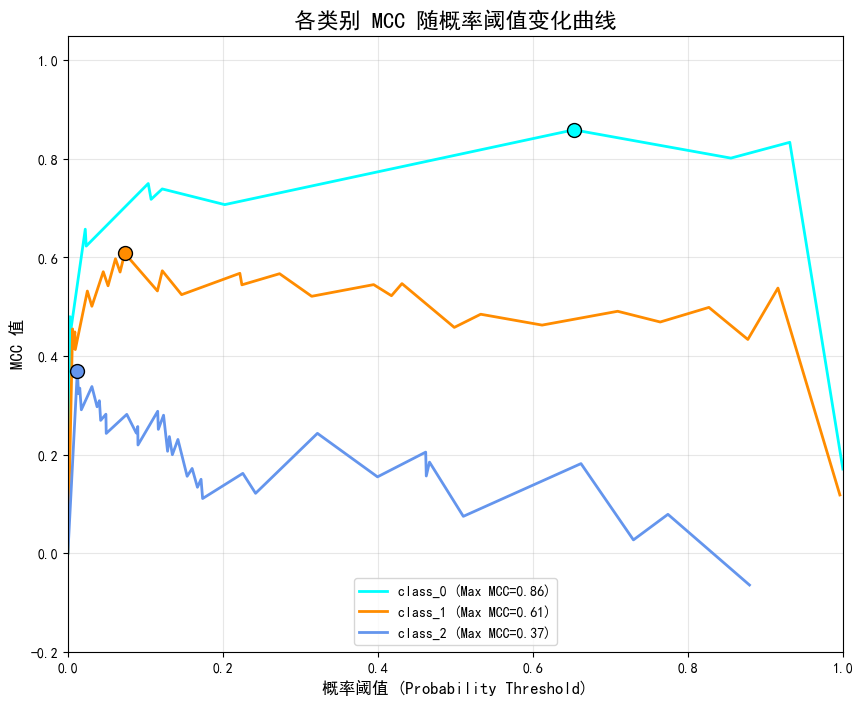

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, matthews_corrcoef

# --- 1. 设置画图风格 ---
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

# --- 2. 加载数据 & 预处理 ---
wine = datasets.load_wine()
X = wine.data
y = wine.target
class_names = wine.target_names  

# 【为了演示效果添加噪声】
# 鸢尾花太简单，不加噪声 MCC 很容易全是 1.0，加噪声为了模拟真实困难场景
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 【标签二值化】
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# --- 3. 训练模型 (改为输出概率) ---
# 使用 OneVsRest 策略训练逻辑回归
classifier = OneVsRestClassifier(LogisticRegression(random_state=0, solver='liblinear'))

# 【核心修改点】使用 predict_proba 获取 [0, 1] 之间的概率
# y_score 的形状是 (n_samples, n_classes)，每一列对应一个类别的正例概率
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# --- 4. 遍历阈值计算 MCC 并寻找最佳点 ---
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue']

print("="*20 + " 各类别最佳 MCC 分析 (基于概率) " + "="*20)

for i in range(n_classes):
    # 1. 获取当前类别的真实标签 (0或1) 和 预测概率 (0.0~1.0)
    y_true_cls = y_test[:, i]
    y_prob_cls = y_score[:, i]
    
    # 2. 利用 ROC 得到的阈值 (这些是数据中实际存在的关键切分点)
    # roc_curve 返回的 thresholds 是从大到小排序的
    current_fpr, current_tpr, current_thresholds = roc_curve(y_true_cls, y_prob_cls)
    
    # 3. 阈值筛选
    # roc_curve 通常会在第一个位置加一个 > 1 的阈值 (比如 max_prob + 1)，
    # 对于概率来说这是无效的，我们需要过滤掉 > 1.0 的阈值
    valid_thresholds = current_thresholds[current_thresholds <= 1.0]
    
    mcc_list = []
    
    # 4. 遍历这些概率阈值，计算 MCC
    for t in valid_thresholds:
        # 大于等于阈值 t 的预测为 1，否则为 0
        y_pred_cls = (y_prob_cls >= t).astype(int)
        
        # 计算 MCC
        mcc = matthews_corrcoef(y_true_cls, y_pred_cls)
        mcc_list.append(mcc)
    
    # 5. 找到 MCC 最大的位置
    best_idx = np.argmax(mcc_list)
    best_mcc = mcc_list[best_idx]
    best_thresh = valid_thresholds[best_idx]
    
    print(f"【类别 {class_names[i]}】")
    print(f"  最佳 MCC: {best_mcc:.4f}")
    print(f"  最佳阈值: {best_thresh:.4f} (概率值)")
    print("-" * 30)
    
    # 6. 绘制 MCC 随阈值变化的曲线
    plt.plot(valid_thresholds, mcc_list, color=colors[i], lw=2, 
             label=f'{class_names[i]} (Max MCC={best_mcc:.2f})')
    
    # 标记最高点
    plt.scatter(best_thresh, best_mcc, s=100, color=colors[i], edgecolors='k', zorder=10)

# --- 5. 完善图表 ---
plt.xlabel('概率阈值 (Probability Threshold)', fontsize=12)
plt.ylabel('MCC 值', fontsize=12)
plt.title('各类别 MCC 随概率阈值变化曲线', fontsize=16)
plt.legend(loc="lower center") # 图例放下面，避免挡住曲线
plt.grid(True, alpha=0.3)

# 【核心修改点】限制 X 轴为 0 到 1，因为现在是概率
plt.xlim([0.0, 1.0])
plt.ylim([-0.2, 1.05]) 

plt.show()

实际上，可以给每个类别单独寻找阈值，即使这样拼不成一个完整的混淆矩阵

但是这样可以起到最好的效果，在实际工业界有价值。